<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Модели" data-toc-modified-id="Модели-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Модели</a></span></li><li><span><a href="#Города" data-toc-modified-id="Города-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Города</a></span></li></ul></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Графики</a></span></li><li><span><a href="#Результаты-исследования" data-toc-modified-id="Результаты-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Результаты исследования</a></span><ul class="toc-item"><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></li></ul></div>

# Аналитика в авиакомпании
<p>
<div align="right"><b>Спринт 13 | Когорта ДС13 | Артур Урусов</b></div>

<blockquote>
<p>Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

<p>Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.
</blockquote>

Для начала подключим необходимые модули.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Подготовка

Загрузим результаты SQL-запросов в соотвтетствующие переменные.

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

### Модели

Для начала посмотрим на выгрузку по моделям самолётов. Получим основную информацию по датафрейму и выведем его на экран:

In [3]:
models.info()
models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Исходя из значений в столбцах, можно сказать, что типы данных установлены корректно. В датафрейме находятся 8 моделей самолетов и количество полетов на каждой модели в течение сентября 2018 года. 

Видно, что у самолётов моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 количество полётов на порядок больше, чем у остальных. Вероятно, в парке компании этих самолётов значительно больше. Кроме того, эти самолёты имеют меньшую вместительность и дальность полёта, а значит скорее всего используются для коротких но частых региональных полётов.

У компаний Airbus и Boeing представлено несколько моделей, поэтому можем сгруппировать данные по признаку призводителя. Для этого напишем функцию:

In [4]:
def maker_maker(df):
    if 'Airbus' in str(df['model']):
        return 'Airbus'
    elif 'Boeing' in str(df['model']):
        return 'Boeing'
    return 'other'

И применим её к датафрейму:

In [5]:
models['maker'] = models.apply(lambda row: maker_maker(row), axis=1)

Получим столбец с производителем.

In [6]:
models

,model,flights_amount,maker
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,other
6,Cessna 208 Caravan,4557,other
7,Sukhoi SuperJet-100,4185,other


Выведем количество полётов, сгруппированное по производителям.

In [7]:
models.groupby('maker').sum().reset_index()

,maker,flights_amount
0,Airbus,1567
1,Boeing,1530
2,other,13188


Полетов на Airbus и Boeing примерно одинаково, а вот «остальные» летают почти в 10 раз больше.

### Города

Теперь изучим датафрейм с городами.

In [8]:
cities.info()
cities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Имеем даные по среднему количеству полётов в день в 101 город России.

In [9]:
cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В среднем, в каждый город летает 5 самолётов в день, однако 75% городов принимают не больше 6 самолётов в день. При этом, самое большое среднеее количество рейсов в день - 129.

Напишем функцию для присвоения городам категории "**top10**":

In [10]:
def top10_maker(row, df):
    top10 = list(df.sort_values('average_flights', ascending=False).head(10)['city'])
    if str(row['city']) in top10:
        return True
    return False

Применим функцию к датафрейму.

In [11]:
cities['top10'] = cities.apply(lambda row: top10_maker(row, cities), axis=1)

Ссоздадим датафрейм с **top10** городами:

In [12]:
top10_cities = cities[cities['top10'] == True].sort_values('average_flights', ascending=False)

Узнаем средние значения для top10 и остальных городов.

In [13]:
cities.groupby('top10').mean().reset_index().sort_values('average_flights', ascending=False)

,top10,average_flights
1,True,25.067742
0,False,3.343249


Видно огромную разницу между первыми десятью городами и остальными, средние значения отличаются почти в 5 раз.

Посмотрим общее количество рейсов по этим категориям.

In [14]:
cities.groupby('top10').sum().reset_index().sort_values('average_flights', ascending=False)

,top10,average_flights
0,False,304.235681
1,True,250.677419


На 10 городов приходится почти 55% всех рейсов, а на остальные 91 город - около 45% рейсов.

Для корректного отображения графика создадим отсортированный датафрейм, а столбец с городами сделаем порядковыми категориями.

In [15]:
sorted_cities = cities.sort_values('average_flights').reset_index(drop=True)
sorted_cities['city'] = pd.Categorical(
    sorted_cities['city'],
    categories=list(sorted_cities['city']),
    ordered=True
)
sorted_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
city               101 non-null category
average_flights    101 non-null float64
top10              101 non-null bool
dtypes: bool(1), category(1), float64(1)
memory usage: 6.9 KB


## Графики

Построим графики для моделей самолётов. Первый график по моделям, второй - по производителям.

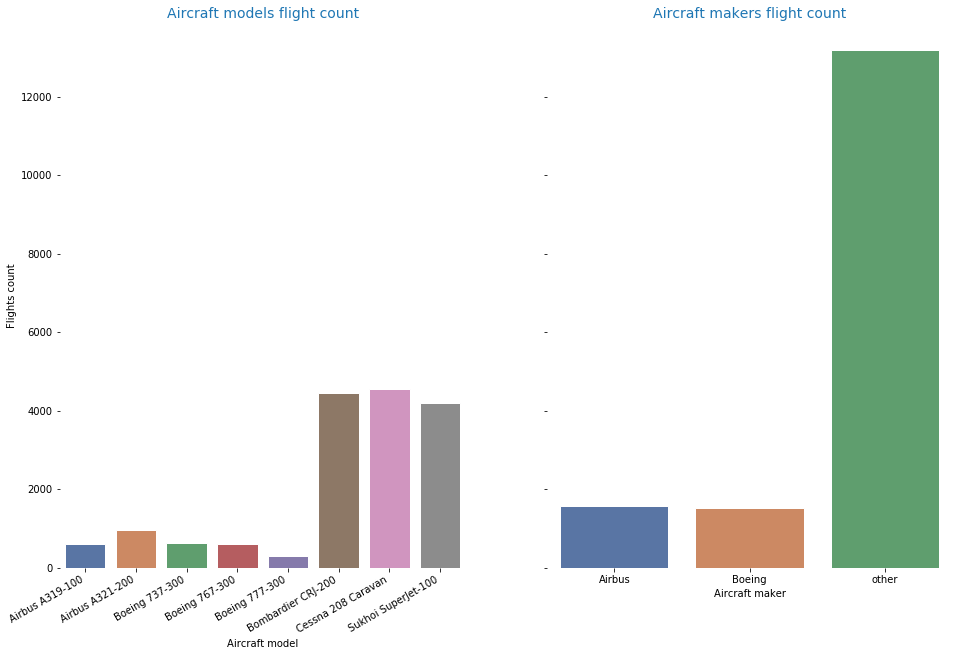

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)
sns.set(style="whitegrid")

sns.barplot(
    x="model", 
    y="flights_amount", 
    data=models, 
    ax=ax1
)
sns.despine(left=True, bottom=True)
ax1.set_title('Aircraft models flight count', color='tab:blue', size=14)
ax1.set_ylabel('Flights count')
ax1.set_xlabel('Aircraft model')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')

sns.barplot(
    x="maker", 
    y="flights_amount", 
    data=models.groupby('maker').sum().reset_index(), 
    ax=ax2
)

sns.despine(left=True, bottom=True)
ax2.set_title('Aircraft makers flight count', color='tab:blue', size=14)
ax2.set_ylabel('')
ax2.set_xlabel('Aircraft maker')

plt.show()

Как уже было сказано, у самолётов моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 количество полётов на порядок больше, чем у Аэробусов и Боингов. Вероятно, в парке компании этих самолётов значительно больше. Кроме того, эти самолёты имеют меньшую вместительность и дальность полёта, а значит скорее всего используются для коротких но частых региональных полётов. Ещё одной причиной большего количества полётов этих моделей наверняка является их более низкая цена, а значит доля этих моделей в парке самолётов компании может быть намного большей, чем у Аэробусов и Боингов.

Кроме того, даже все Аэробусы или Боинги, и даже Аэробусы и Боинги вместе взятые не летают так много, как любая модель из категории "other".

Построим график среднего количества рейсов в день в города России:

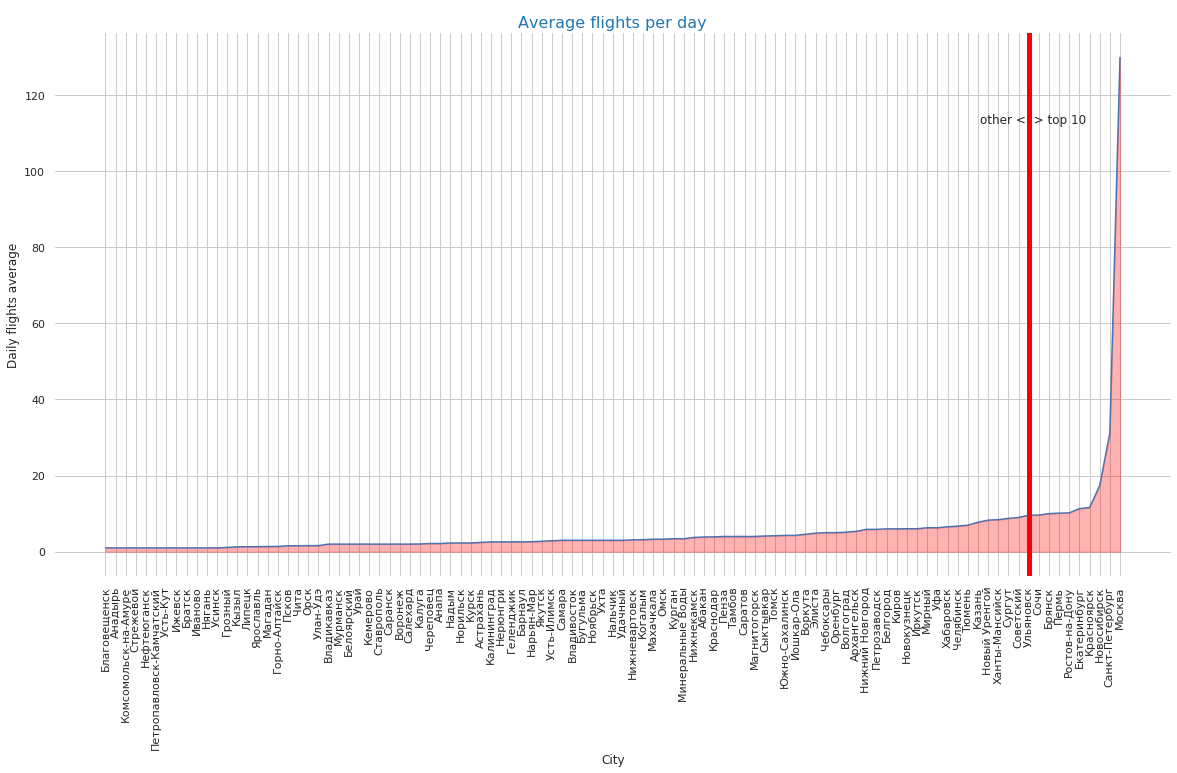

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(
    x='city', 
    y='average_flights', 
    data=sorted_cities, 
    ax=ax
)
sns.despine(left=True, bottom=True)


plt.axvline(len(sorted_cities)-10, lw=5, c='red')
ax.annotate('other <  > top 10', xy=(980, 650), xycoords='figure points')

plt.title('Average flights per day', color='tab:blue', size=16)
ax.set_ylabel('Daily flights average')
ax.set_xlabel('City')

ax.fill_between(sorted_cities['city'], 0, sorted_cities['average_flights'], color='red', alpha=.3)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()

На этом графике видим, что на самом деле граница проходит даже не между **top10** и остальными городами, а между **top3** и остальными. Именно начиная с Новосибирска виден резкий рост рейсов, до этого количество рейсов увеличивается достаточно плавно. Очевидно, что это связано и с количеством населения этих городов и с их экономической значимостью.

Взглянем на **top10** городов поближе.

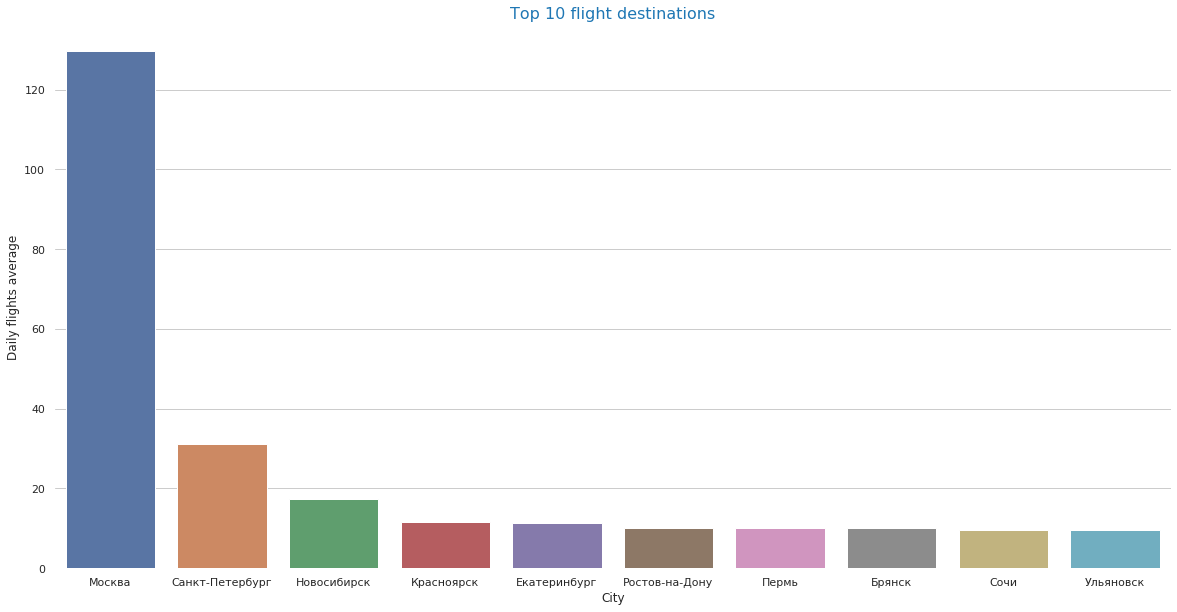

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

sns.barplot(
    x='city', 
    y='average_flights', 
    data=top10_cities, 
    ax=ax
)
sns.despine(left=True, bottom=True)

plt.title('Top 10 flight destinations', color='tab:blue', size=16)
ax.set_ylabel('Daily flights average')
ax.set_xlabel('City')

plt.show()

Количество рейсов в Москву огромно, следующие города вместе принимают примерно столько же рейсов в день, сколько одна Москва, однако Санкт-Петербург и Новосибирск тоже принимают заметно больше рейсов, чем другие города, что подтверждает предыдущее наблюдение про **top3**. После Новосибирска разница в количестве рейсов практически не видна.

## Результаты исследования

### Общие выводы

В рамках проекта мы сделали несколько SQL-запросов из базы данных авиакомпании. На основании двух из этих запросов мы провели небольшой анализ.

В первом запросе мы рассмотрели количество рейсов за месяц на разных моделях самолётов. Мы выяснили, что у самолётов моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 количество полётов на порядок больше, чем у Аэробусов и Боингов. Вероятно, в парке компании этих самолётов значительно больше. Кроме того, эти самолёты имеют меньшую вместительность и дальность полёта, а значит скорее всего используются для коротких но частых региональных полётов. Ещё одной причиной большего количества полётов этих моделей наверняка является их более низкая цена, а значит доля этих моделей в парке самолётов компании может быть намного большей, чем у Аэробусов и Боингов. Кроме того, даже все Аэробусы или Боинги, и даже Аэробусы и Боинги вместе взятые не летают так много, как любая модель из категории "other".

Во втором запросе мы рассмотрели среднее количество рейсов в день в 101 город России. Мы заметили, что начиная с Новосибирска (то есть для Новосибирска, Санкт-Петербурга и Москвы) виден резкий рост рейсов, до этого количество рейсов увеличивается достаточно плавно. Очевидно, что это связано и с количеством населения этих городов и с их экономической значимостью.

### Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод